In [138]:
from PIL import Image
import matplotlib.pyplot as plt
import os.path as path
from scipy.ndimage import gaussian_filter, gaussian_filter1d, convolve1d
import numpy as np
import matplotlib as mpl
from scipy.signal import argrelextrema
from tqdm import tqdm

mpl.rc("image", cmap="gray")

In [145]:
data_path = "../../data/week2"
img = Image.open(path.join(data_path, "test_blob_uniform.png"))
arr = np.asarray(img, dtype=float)/255

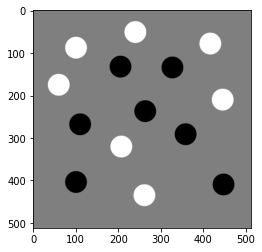

In [140]:
plt.imshow(arr)

## Exercise 1
### Gaussian filter kernel

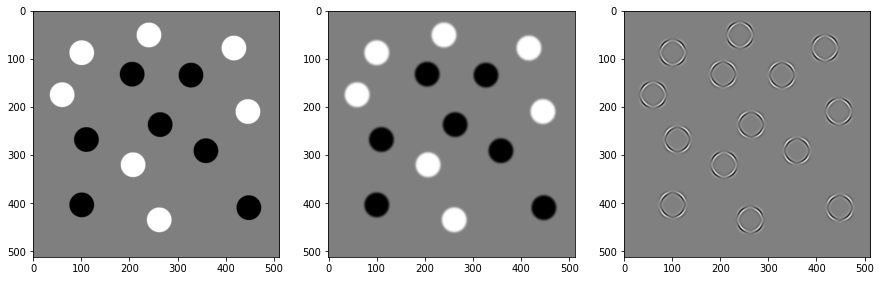

In [141]:
t = 4
sigma = t**.5

def gauss(arr, sigma):
    return gaussian_filter1d(
        gaussian_filter1d(arr, sigma, order=0, axis=1), sigma, axis=0, order=0
    )

def derived_gauss(arr, sigma):
    return gaussian_filter1d(
        gaussian_filter1d(arr, sigma, order=2, axis=1), sigma, axis=0, order=2
    )

normal = gauss(arr, sigma)
derived = derived_gauss(arr, sigma)


fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(arr)
ax2.imshow(normal)
ax3.imshow(derived)

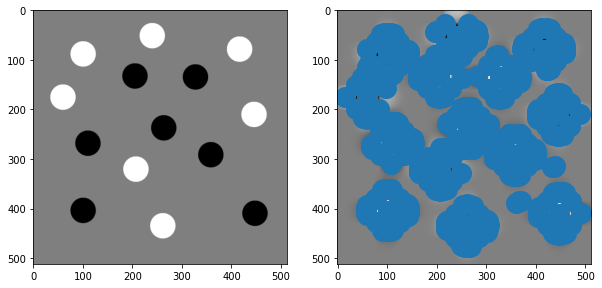

In [174]:
t = 312.5
sigma = t**.5 
def laplacian(arr, sigma):
    xx = gaussian_filter1d(arr, sigma, axis=0, order=2)
    yy = gaussian_filter1d(arr, sigma, axis=1, order=2)
    return xx + yy

lap = laplacian(arr, sigma)
def find_local_extrema(img: np.ndarray, threshold, s=3):
    extrema = []
    
    xg = set(list(zip(*argrelextrema(img, np.greater, axis=0))))
    yg = set(list(zip(*argrelextrema(img, np.greater, axis=1))))
    
    extrema.extend(
        xg.intersection(yg)
    )
    
    xl = set(list(zip(*argrelextrema(img, np.less, axis=0))))
    yl = set(list(zip(*argrelextrema(img, np.less, axis=1))))
    
    extrema.extend(
        xl.intersection(yl)
    )
    
    ext = np.array([
        [x[0] for x in extrema],
        [x[1] for x in extrema]
    ])
    
    return [x for x in ext if arr[x[0], x[1]] > threshold]

threshold = 0.001
extrema = find_local_extrema(lap, threshold)


s = 1
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(arr)
ax2.imshow(lap)
ax2.scatter(extrema[1], extrema[0], s=400)

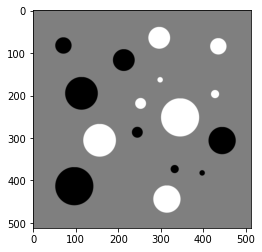

In [143]:
data_path = "../../data/week2"
img = Image.open(path.join(data_path, "test_blob_varying.png"))
arr = np.asarray(img, dtype=float)/255

plt.imshow(arr)

100%|██████████| 5/5 [00:01<00:00,  2.51it/s]


(2, 167)


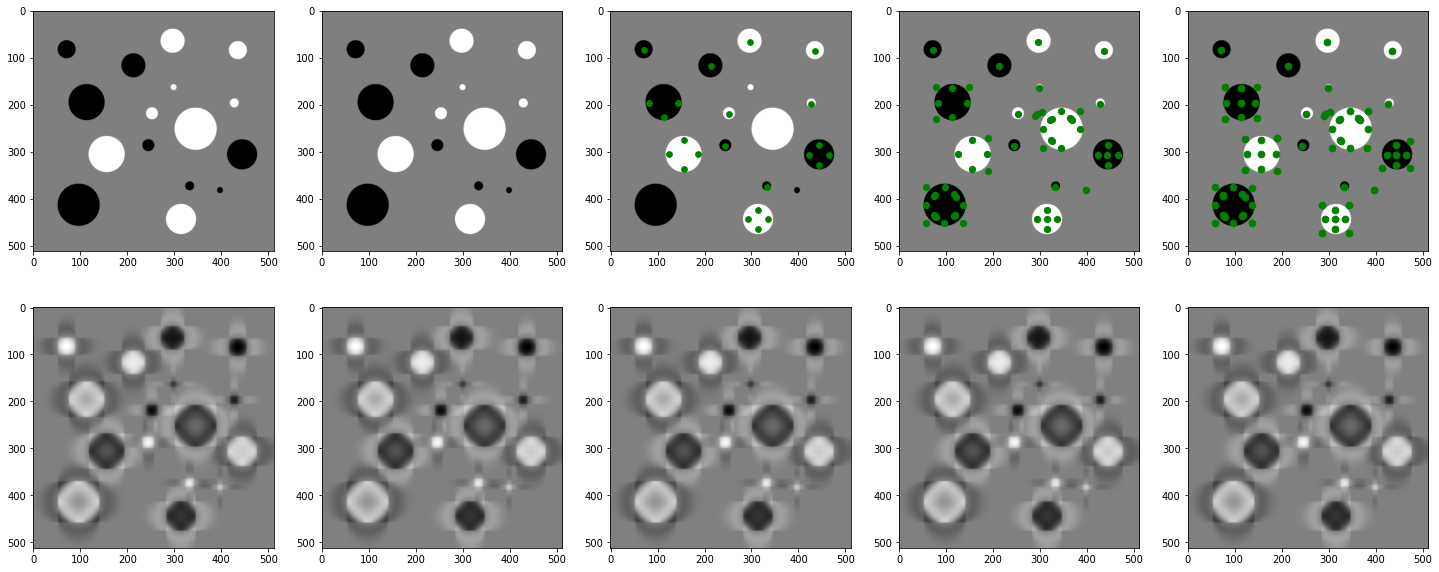

In [144]:
def lap_norm_t(img, tstart=4, tstop=312.5, size=4, gamma=1, threshold=.1):
    _, axs = plt.subplots(2, size, figsize=(5*size, 10))
    
    laplacians = []
    for t in tqdm(np.linspace(tstart, tstop, size), total=size):
        laplacians.append(
            laplacian(img, sigma) * (t ** gamma)
        )
    
    scale_space = np.stack(laplacians) 
    
    extremas = np.array([[]])
    for lap, t, ax in tqdm(zip(scale_space, np.linspace(tstart, tstop, size), axs.flatten()[:5]), total=size):
        extrema = find_local_extrema(lap, threshold)

        extremas = np.append(extremas, extrema)
        
        ax.imshow(arr)
        
        radii = (2 * t) ** .5
        ax.scatter(extrema[1], extrema[0], radii, color="green")

    for lab, ax in zip(scale_space, axs.flatten()[5:]):
        ax.imshow(lab)

    return extremas.reshape((2, extremas.size//2))

extrema = lap_norm_t(arr, tstart=50, tstop=1000, size=5, threshold=.5)
print(extrema.shape)